In [41]:
from fastai.vision.all import *

In [42]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/Users/jack/.fastai/data/mnist_sample/valid'),Path('/Users/jack/.fastai/data/mnist_sample/labels.csv'),Path('/Users/jack/.fastai/data/mnist_sample/train')]

In [43]:
(path/'train').ls()

(#2) [Path('/Users/jack/.fastai/data/mnist_sample/train/7'),Path('/Users/jack/.fastai/data/mnist_sample/train/3')]

In [44]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/Users/jack/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10091.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10093.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10097.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10099.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10116.png'),Path('/Users/jack/.fastai/data/mnist_sample/train/3/10125.png'),Path('/Users/jack/.fastai/data/mnis

In [45]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [46]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

In [47]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

<Axes: >

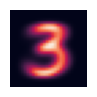

In [48]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
show_image(mean3)

In [49]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [50]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [51]:
valid_3_dist = mnist_distance(valid_3_tens,mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

In [52]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x, mean7)

In [53]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [54]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## Learning MNIST Experiment

tensor(0.0285)
tensor(0.0050)


(tensor(0.9376), tensor(0.9805), tensor(0.9591))

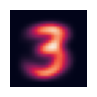

In [55]:
## Experiment: Weigh the incorrect answers more.
three_tensors_2 = [tensor(Image.open(o)) for o in threes]
seven_tensors_2 = [tensor(Image.open(o)) for o in sevens]
three_extra_tensors = [tensor(Image.open(o)) for o in threes if not is_3(tensor(Image.open(o)))]
seven_extra_tensors = [tensor(Image.open(o)) for o in sevens if is_3(tensor(Image.open(o)))]
factor = 10
three_tensors_2 = three_tensors_2 + (three_extra_tensors * factor)
seven_tensors_2 = seven_tensors_2 + (seven_extra_tensors * factor)

stacked_threes_2 = torch.stack(three_tensors_2).float()/255
stacked_sevens_2 = torch.stack(seven_tensors_2).float()/255
mean3_2 = stacked_threes_2.mean(0)
mean7_2 = stacked_sevens_2.mean(0)
show_image(mean3_2)

print(mnist_distance(mean3, mean3_2))
print(mnist_distance(mean7, mean7_2))

def is_3_weighted(x): return mnist_distance(x,mean3_2) < mnist_distance(x, mean7_2)

accuracy_3s_2 = is_3_weighted(valid_3_tens).float().mean()
accuracy_7s_2 = (1 - is_3_weighted(valid_7_tens).float()).mean()

accuracy_3s_2, accuracy_7s_2, (accuracy_3s_2 + accuracy_7s_2) / 2

In [56]:
mnist_path = untar_data(URLs.MNIST)
mnist_path.ls()
(mnist_path/'training').ls()

(#10) [Path('/Users/jack/.fastai/data/mnist_png/training/9'),Path('/Users/jack/.fastai/data/mnist_png/training/0'),Path('/Users/jack/.fastai/data/mnist_png/training/7'),Path('/Users/jack/.fastai/data/mnist_png/training/6'),Path('/Users/jack/.fastai/data/mnist_png/training/1'),Path('/Users/jack/.fastai/data/mnist_png/training/8'),Path('/Users/jack/.fastai/data/mnist_png/training/4'),Path('/Users/jack/.fastai/data/mnist_png/training/3'),Path('/Users/jack/.fastai/data/mnist_png/training/2'),Path('/Users/jack/.fastai/data/mnist_png/training/5')]

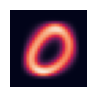

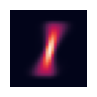

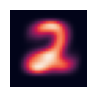

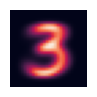

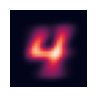

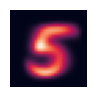

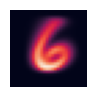

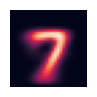

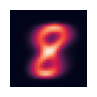

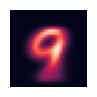

In [57]:
train_digit_paths = { digit : (mnist_path/'training'/str(digit)).ls().sorted() for digit in range(0, 10)}
val_digit_paths = { digit : (mnist_path/'training'/str(digit)).ls().sorted() for digit in range(0, 10)}

train_tensors = { digit : [tensor(Image.open(o)) for o in train_digit_paths[digit]] for digit in range(0, 10)}
val_tensors = { digit : [tensor(Image.open(o)) for o in val_digit_paths[digit]] for digit in range(0, 10)}

stacked_train_tensors = {digit : torch.stack(train_tensors[digit]).float() / 255 for digit in range(0, 10)}
stacked_val_tensors = {digit : torch.stack(val_tensors[digit]).float() / 255 for digit in range(0, 10)}

means = [stacked_train_tensors[digit].mean(0) for digit in range(0, 10)]

for img in means:
    show_image(img)

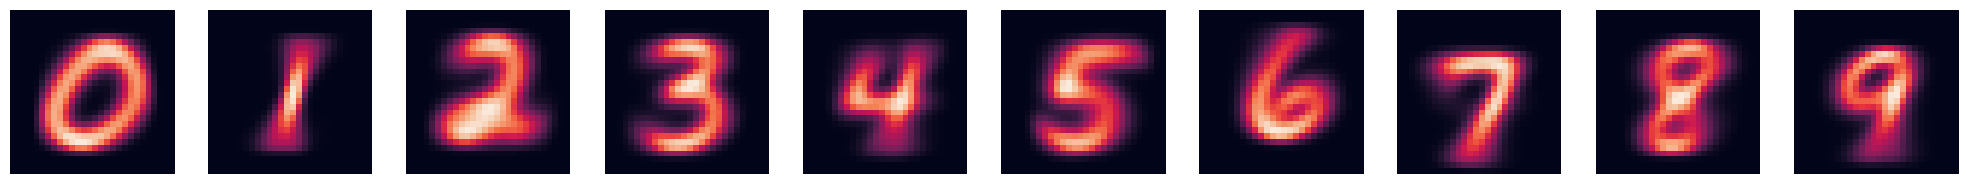

In [79]:
import matplotlib.pyplot as plt

# Create a figure with one row and as many columns as there are mean images
fig, axes = plt.subplots(1, len(means), figsize=(len(means)*2, 2))
for ax, img in zip(axes, means):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [58]:
def classify_img(x):
    losses = [mnist_distance(means[i],x) for i in range(0,10)]
    return losses.index(min(losses))

def classify(x, y):
    return classify_img(x) == y

# accuracy_3s_2 = is_3_weighted(valid_3_tens).float().mean()
accuracies = []
for digit, images in stacked_val_tensors.items():
    correct = 0
    for img in images:
        if classify(img, digit):
            correct += 1
    accuracies.append(correct / len(images))

print(accuracies)
print(np.array(accuracies).mean())
baseline = np.array(accuracies).mean()

[0.8141144690190781, 0.9980717887867102, 0.4328633769721383, 0.5835915837546893, 0.6648408079424855, 0.30012912746725695, 0.7453531598513011, 0.7778132482043096, 0.39582977268842934, 0.7162548327449991]
0.64288621674314


In [73]:
# Training Loop with momentum update for means
accuracies = [baseline]
momentum = 0.97  # Adjust the momentum factor as needed

def classify_img_means(x, ideals):
    losses = [mnist_distance(ideals[i], x) for i in range(0, 10)]
    return losses.index(min(losses))

def classify_means(x, y, ideals):
    return classify_img_means(x, ideals) == y

last_ideals = means
last_train_tensors = train_tensors.copy()  # Copy to preserve original training tensors

for epoch in range(15):
    extra_train_tensors = {}
    for digit in range(0, 10):
        extra_list = []
        for o in train_digit_paths[digit]:
            img_tensor = tensor(Image.open(o))  # Load image once
            if not classify_means(img_tensor, digit, last_ideals):
                extra_list.append(img_tensor)
        extra_train_tensors[digit] = extra_list

    # Update the training tensors in place
    for digit in range(0, 10):
        last_train_tensors[digit].extend(extra_train_tensors[digit])

    # Stack the training tensors for each digit
    stacked_train_tensors = {
        digit: torch.stack(last_train_tensors[digit]).float() / 255
        for digit in range(0, 10)
    }

    # Compute new means using a momentum-based moving average
    new_means = []
    for digit in range(10):
        epoch_mean = stacked_train_tensors[digit].mean(0)
        updated_mean = momentum * last_ideals[digit] + (1 - momentum) * epoch_mean
        new_means.append(updated_mean)
    last_ideals = new_means

    accs = []
    for digit, images in stacked_val_tensors.items():
        correct = 0
        for img in images:
            if classify_means(img, digit, new_means):
                correct += 1
        accs.append(correct / len(images))

    mean_accuracy = np.array(accs).mean()
    print(mean_accuracy)
    accuracies.append(mean_accuracy)


0.6450372594104758
0.6470560824826272
0.6486078797074637
0.6501652365692088
0.651168687244647
0.6525088031216357
0.6539938239740294
0.6550083955483492
0.6563402962431407
0.6572675719192124
0.6581999114598607
0.659016907799846
0.659948222791871
0.660616405562864
0.661300100065131


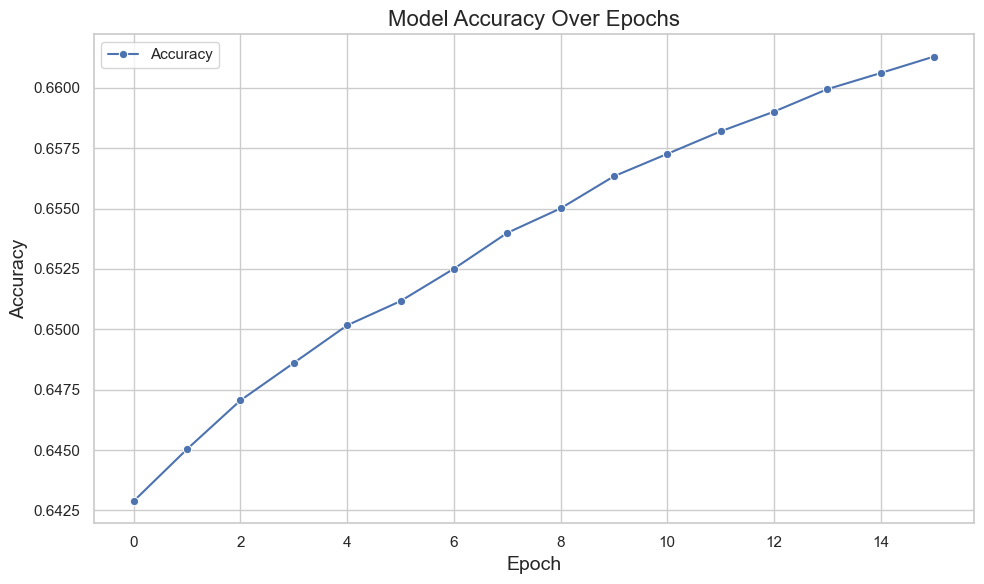

In [77]:
# Previous best was 0.6503 (momentum 0)
# 0.95 - 0.6605
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a line plot with markers
ax = sns.lineplot(x=range(len(accuracies)), y=accuracies, marker="o", label="Accuracy")

# Set plot title and labels
plt.title("Model Accuracy Over Epochs", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()